In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
data = sns.load_dataset('titanic')

In [18]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [19]:
data.dropna(inplace=True)

In [20]:
data['pclass'].unique()
data['pclass'].value_counts()

1    157
2     15
3     10
Name: pclass, dtype: int64

In [21]:
data['sex'].value_counts()

male      94
female    88
Name: sex, dtype: int64

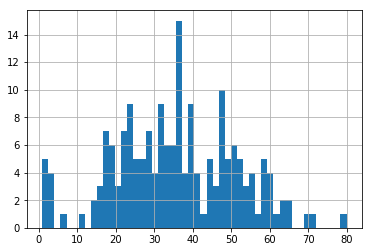

In [22]:
data['age'].hist(bins=50)

## Data Preprocessing

In [23]:
x = data[['pclass','sex','age']]

In [24]:
from sklearn import preprocessing

In [25]:
lb = preprocessing.LabelBinarizer()

In [26]:
x['sex']=lb.fit_transform(x['sex'])

C:\Users\winuser\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
x.head()

,pclass,sex,age
1,1,0,38.0
3,1,0,35.0
6,1,1,54.0
10,3,0,4.0
11,1,0,58.0


In [28]:
x.shape

(182, 3)

In [29]:
x.describe()

,pclass,sex,age
count,182.000000,182.000000,182.000000
mean,1.192308,0.516484,35.623187
std,0.516411,0.501107,15.671615
min,1.000000,0.000000,0.920000
25%,1.000000,0.000000,24.000000
50%,1.000000,1.000000,36.000000
75%,1.000000,1.000000,47.750000
max,3.000000,1.000000,80.000000


In [30]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 3 columns):
pclass    182 non-null int64
sex       182 non-null int32
age       182 non-null float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 5.0 KB


In [31]:
#x['age'].fillna(np.mean(x['age']),inplace=True)
y = data['survived']

In [32]:
y.value_counts()

1    123
0     59
Name: survived, dtype: int64

## Model Fit

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [34]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [104]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [105]:
def print_score(clf,X_train,y_train, X_test, y_test,train = True):
    '''
    print the accuracy, classification report, confusion matrix of classifier
    '''
    if train:
        '''
        Training Performance
        '''
        
        print("Train Result: \n")
        print('accuracy score: {0:.4f}\n'.format(accuracy_score(y_train,clf.predict(X_train))))
        print('classification_report: \n {}\n'.format(classification_report(y_train,clf.predict(X_train))))
        print('Confusion matrix: \n {} \n'.format(confusion_matrix(y_train,clf.predict(X_train))))
        
        res = cross_val_score(clf,X_train,y_train,cv=10,scoring='accuracy')
        print('Average Accuracy: \t {0:.4f}'.format(np.mean(res)))
        print('Accuracy SD: \t {0:.4f}'.format(np.std(res)))
        
    elif train == False:
        
        '''
        test performance
        '''
        print('Test Result: \n')
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,clf.predict(X_test))))
        print('classification_report: \n {}\n'.format(classification_report(y_test,clf.predict(X_test))))
        print('Confusion matrix: \n {} \n'.format(confusion_matrix(y_test,clf.predict(X_test))))

## Decision tree

In [106]:
clf = DecisionTreeClassifier(random_state=42)

In [107]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [108]:
print_score(clf,X_train,y_train,X_test,y_test,train=True)

Train Result: 

accuracy score: 0.9606

classification_report: 
              precision    recall  f1-score   support

          0       0.90      0.97      0.94        37
          1       0.99      0.96      0.97        90

avg / total       0.96      0.96      0.96       127


Confusion matrix: 
 [[36  1]
 [ 4 86]] 

Average Accuracy: 	 0.7641
Accuracy SD: 	 0.1119


In [109]:
print_score(clf,X_train,y_train,X_test,y_test,train=False) # Test

Test Result: 

Accuracy Score: 0.7091

classification_report: 
              precision    recall  f1-score   support

          0       0.65      0.59      0.62        22
          1       0.74      0.79      0.76        33

avg / total       0.71      0.71      0.71        55


Confusion matrix: 
 [[13  9]
 [ 7 26]] 



## Bagging (OOB_Score=False)

In [42]:
bag_clf = BaggingClassifier(base_estimator=clf,n_estimators=1000,
                           bootstrap= True,n_jobs=-1,
                           random_state=42)

In [43]:
bag_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=1000, n_jobs=-1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [44]:
print_score(bag_clf,X_train,y_train,X_test,y_test,train=True)

Train Result: 

accuracy score: 0.9669

classification_report: 
              precision    recall  f1-score   support

          0       0.94      0.94      0.94        35
          1       0.98      0.98      0.98        86

avg / total       0.97      0.97      0.97       121


Confusion matrix: 
 [[33  2]
 [ 2 84]] 

Average Accuracy: 	 0.8044
Accuracy SD: 	 0.1360


In [45]:
print_score(bag_clf,X_train,y_train,X_test,y_test,train=False)

Test Result: 

Accuracy Score: 0.7541

classification_report: 
              precision    recall  f1-score   support

          0       0.74      0.58      0.65        24
          1       0.76      0.86      0.81        37

avg / total       0.75      0.75      0.75        61


Confusion matrix: 
 [[14 10]
 [ 5 32]] 



***

## Bagging (OOB_Score = True)
use out-of-bag samples to estimate the generalisation accuracy

In [46]:
bag_clf = BaggingClassifier(base_estimator=clf,n_estimators=5000,
                           bootstrap=True,oob_score=True,
                           n_jobs = -1,random_state=42)

In [47]:
bag_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=5000, n_jobs=-1, oob_score=True,
         random_state=42, verbose=0, warm_start=False)

In [48]:
bag_clf.oob_score_

0.8016528925619835

In [49]:
print_score(bag_clf,X_train,y_train,X_test,y_test,train=True)

Train Result: 

accuracy score: 0.9669

classification_report: 
              precision    recall  f1-score   support

          0       0.94      0.94      0.94        35
          1       0.98      0.98      0.98        86

avg / total       0.97      0.97      0.97       121


Confusion matrix: 
 [[33  2]
 [ 2 84]] 

Average Accuracy: 	 0.8044
Accuracy SD: 	 0.1360


In [50]:
print_score(bag_clf,X_train,y_train,X_test,y_test,train=False)

Test Result: 

Accuracy Score: 0.7541

classification_report: 
              precision    recall  f1-score   support

          0       0.74      0.58      0.65        24
          1       0.76      0.86      0.81        37

avg / total       0.75      0.75      0.75        61


Confusion matrix: 
 [[14 10]
 [ 5 32]] 



## RANDOM FOREST

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [53]:
def print_score(clf,X_train,y_train, X_test, y_test,train = True):
    '''
    print the accuracy, classification report, confusion matrix of classifier
    '''
    if train:
        '''
        Training Performance
        '''
        
        print("Train Result: \n")
        print('accuracy score: {0:.4f}\n'.format(accuracy_score(y_train,clf.predict(X_train))))
        print('classification_report: \n {}\n'.format(classification_report(y_train,clf.predict(X_train))))
        print('Confusion matrix: \n {} \n'.format(confusion_matrix(y_train,clf.predict(X_train))))
        
        res = cross_val_score(clf,X_train,y_train,cv=10,scoring='accuracy')
        print('Average Accuracy: \t {0:.4f}'.format(np.mean(res)))
        print('Accuracy SD: \t {0:.4f}'.format(np.std(res)))
        
    elif train == False:
        
        '''
        test performance
        '''
        print('Test Result: \n')
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,clf.predict(X_test))))
        print('classification_report: \n {}\n'.format(classification_report(y_test,clf.predict(X_test))))
        print('Confusion matrix: \n {} \n'.format(confusion_matrix(y_test,clf.predict(X_test))))

In [112]:
rf_clf = RandomForestClassifier(random_state=42)

In [113]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [114]:
print_score(rf_clf,X_train,y_train, X_test, y_test,train=True)

Train Result: 

accuracy score: 0.9449

classification_report: 
              precision    recall  f1-score   support

          0       0.86      0.97      0.91        37
          1       0.99      0.93      0.96        90

avg / total       0.95      0.94      0.95       127


Confusion matrix: 
 [[36  1]
 [ 6 84]] 

Average Accuracy: 	 0.7801
Accuracy SD: 	 0.0767


In [115]:
print_score(rf_clf,X_train,y_train, X_test, y_test,train=False)

Test Result: 

Accuracy Score: 0.6545

classification_report: 
              precision    recall  f1-score   support

          0       0.56      0.64      0.60        22
          1       0.73      0.67      0.70        33

avg / total       0.66      0.65      0.66        55


Confusion matrix: 
 [[14  8]
 [11 22]] 



## Grid Search

In [116]:
from sklearn.pipeline import Pipeline

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
rf_clf = RandomForestClassifier(random_state=42)

In [119]:
params_grid = {'max_depth':[3,None],
              'min_samples_split':[2,3,10],
              'min_samples_leaf':[1,3,10],
              'bootstrap':[True,False],
              'criterion':['gini','entropy']}

In [120]:
grid_search = GridSearchCV(rf_clf,params_grid,
                          n_jobs=-1,cv=5,
                          verbose=1,scoring='accuracy')

In [121]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    7.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, None], 'min_samples_split': [2, 3, 10], 'min_samples_leaf': [1, 3, 10], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [122]:
grid_search.best_score_

0.8188976377952756

In [123]:
grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [124]:
print_score(grid_search,X_train,y_train, X_test, y_test,train=True)

Train Result: 

accuracy score: 0.9449

classification_report: 
              precision    recall  f1-score   support

          0       0.86      0.97      0.91        37
          1       0.99      0.93      0.96        90

avg / total       0.95      0.94      0.95       127


Confusion matrix: 
 [[36  1]
 [ 6 84]] 

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    4.1s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    4.0s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    4.2s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    4.2s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    3.9s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    3.8s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    3.7s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    4.0s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    3.8s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    2.9s


Average Accuracy: 	 0.7397
Accuracy SD: 	 0.0799


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    4.0s finished


In [125]:
print_score(grid_search,X_train,y_train, X_test, y_test,train=False)

Test Result: 

Accuracy Score: 0.6545

classification_report: 
              precision    recall  f1-score   support

          0       0.56      0.64      0.60        22
          1       0.73      0.67      0.70        33

avg / total       0.66      0.65      0.66        55


Confusion matrix: 
 [[14  8]
 [11 22]] 



## Extra-Trees (Extremely Randomized Trees) ensemble
* Random forest is build upon Decision Tree
* Decision Tree node splitting is based on gini or entropy or some other algorithms
* Extra-Trees make use of random thresholds for each feature unlike Decision Trees

In [126]:
from sklearn.ensemble import ExtraTreesClassifier

In [127]:
xt_clf = ExtraTreesClassifier(random_state=42,min_samples_split=5)

In [128]:
xt_clf.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [129]:
print_score(xt_clf,X_train,y_train, X_test, y_test,train=True)

Train Result: 

accuracy score: 0.9370

classification_report: 
              precision    recall  f1-score   support

          0       0.89      0.89      0.89        37
          1       0.96      0.96      0.96        90

avg / total       0.94      0.94      0.94       127


Confusion matrix: 
 [[33  4]
 [ 4 86]] 

Average Accuracy: 	 0.7724
Accuracy SD: 	 0.0706


In [130]:
print_score(xt_clf,X_train,y_train, X_test, y_test,train=False)

Test Result: 

Accuracy Score: 0.7636

classification_report: 
              precision    recall  f1-score   support

          0       0.76      0.59      0.67        22
          1       0.76      0.88      0.82        33

avg / total       0.76      0.76      0.76        55


Confusion matrix: 
 [[13  9]
 [ 4 29]] 



***

## BOOSTING (Hypothesis Boosting)
* Combine several weak learners into a strong learner.
* Train predictors sequentially

# AdaBoost / Adaptive Boosting

[Robert Schapire](http://rob.schapire.net/papers/explaining-adaboost.pdf)

[Wikipedia](https://en.wikipedia.org/wiki/AdaBoost)

[Chris McCormick](http://mccormickml.com/2013/12/13/adaboost-tutorial/)

[Scikit Learn AdaBoost](http://scikit-learn.org/stable/modules/ensemble.html#adaboost)

1995

As above for Boosting:
* Similar to human learning, the algo learns from past mistakes by focusing more on difficult problems it did not get right in prior learning. 
* In machine learning speak, it pays more attention to training instances that previously underfitted.

Source: Scikit-Learn:

* Fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. 
* The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction.
* The data modifications at each so-called boosting iteration consist of applying weights $w_1, w_2, …, w_N$ to each of the training samples. 
* Initially, those weights are all set to $w_i = 1/N$, so that the first step simply trains a weak learner on the original data. 
* For each successive iteration, the sample weights are individually modified and the learning algorithm is reapplied to the reweighted data. 
* At a given step, those training examples that were incorrectly predicted by the boosted model induced at the previous step have their weights increased, whereas the weights are decreased for those that were predicted correctly. 
* As iterations proceed, examples that are difficult to predict receive ever-increasing influence. Each subsequent weak learner is thereby forced to concentrate on the examples that are missed by the previous ones in the sequence.



In [131]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [132]:
from sklearn.ensemble import AdaBoostClassifier

In [133]:
ada_clf = AdaBoostClassifier()

In [134]:
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

[SAMME16](https://web.stanford.edu/~hastie/Papers/samme.pdf) (Stagewise Additive Modeling using a Multiclass Exponential loss function).

R stands for real

In [135]:
print_score(ada_clf,X_train,y_train, X_test, y_test,train=True)

Train Result: 

accuracy score: 0.9134

classification_report: 
              precision    recall  f1-score   support

          0       0.86      0.84      0.85        37
          1       0.93      0.94      0.94        90

avg / total       0.91      0.91      0.91       127


Confusion matrix: 
 [[31  6]
 [ 5 85]] 

Average Accuracy: 	 0.7423
Accuracy SD: 	 0.1111


In [136]:
print_score(ada_clf,X_train,y_train, X_test, y_test,train=False)

Test Result: 

Accuracy Score: 0.6727

classification_report: 
              precision    recall  f1-score   support

          0       0.58      0.64      0.61        22
          1       0.74      0.70      0.72        33

avg / total       0.68      0.67      0.67        55


Confusion matrix: 
 [[14  8]
 [10 23]] 



## AdaBoost with Random Forest

In [137]:
from sklearn.ensemble import RandomForestClassifier

In [138]:
ada_clf=AdaBoostClassifier(RandomForestClassifier(n_estimators=500))

In [139]:
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [140]:
print_score(ada_clf,X_train,y_train, X_test, y_test,train=True)

Train Result: 

accuracy score: 0.9606

classification_report: 
              precision    recall  f1-score   support

          0       0.94      0.92      0.93        37
          1       0.97      0.98      0.97        90

avg / total       0.96      0.96      0.96       127


Confusion matrix: 
 [[34  3]
 [ 2 88]] 

Average Accuracy: 	 0.7737
Accuracy SD: 	 0.1033


In [141]:
print_score(ada_clf,X_train,y_train, X_test, y_test,train=False)

Test Result: 

Accuracy Score: 0.7636

classification_report: 
              precision    recall  f1-score   support

          0       0.74      0.64      0.68        22
          1       0.78      0.85      0.81        33

avg / total       0.76      0.76      0.76        55


Confusion matrix: 
 [[14  8]
 [ 5 28]] 



***

# Gradient Boosting / Gradient Boosting Machine (GBM)

Works for both regression and classification

[Wikipedia](https://en.wikipedia.org/wiki/Gradient_boosting)

* Sequentially adding predictors
* Each one correcting its predecessor
* Fit new predictor to the residual errors

Compare this to AdaBoost: 
* Alter instance weights at every iteration


**Step 1. **

  $$Y = F(x) + \epsilon$$

**Step 2. **

  $$\epsilon = G(x) + \epsilon_2$$

  Substituting (2) into (1), we get:
  
  $$Y = F(x) + G(x) + \epsilon_2$$
    
**Step 3. **

  $$\epsilon_2 = H(x)  + \epsilon_3$$

Now:
  
  $$Y = F(x) + G(x) + H(x)  + \epsilon_3$$
  
Finally, by adding weighting  
  
  $$Y = \alpha F(x) + \beta G(x) + \gamma H(x)  + \epsilon_4$$

Gradient boosting involves three elements:

* **Loss function to be optimized**: Loss function depends on the type of problem being solved. In the case of regression problems, mean squared error is used, and in classification problems, logarithmic loss will be used. In boosting, at each stage, unexplained loss from prior iterations will be optimized rather than starting from scratch.

* **Weak learner to make predictions**: Decision trees are used as a weak learner in gradient boosting.

* **Additive model to add weak learners to minimize the loss function**: Trees are added one at a time and existing trees in the model are not changed. The gradient descent procedure is used to minimize the loss when adding trees.

In [142]:
from sklearn.ensemble import GradientBoostingClassifier

In [143]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [144]:
print_score(gbc_clf,X_train,y_train, X_test, y_test,train=True)

Train Result: 

accuracy score: 0.9528

classification_report: 
              precision    recall  f1-score   support

          0       0.94      0.89      0.92        37
          1       0.96      0.98      0.97        90

avg / total       0.95      0.95      0.95       127


Confusion matrix: 
 [[33  4]
 [ 2 88]] 

Average Accuracy: 	 0.7654
Accuracy SD: 	 0.1177


In [145]:
print_score(gbc_fit,X_train,y_train, X_test, y_test,train=False)

Test Result: 

Accuracy Score: 0.7455

classification_report: 
              precision    recall  f1-score   support

          0       0.72      0.59      0.65        22
          1       0.76      0.85      0.80        33

avg / total       0.74      0.75      0.74        55


Confusion matrix: 
 [[13  9]
 [ 5 28]] 



| Classifier | Decision Tree | Bagging | Random Forest | Optimised RF | Extra-Trees | AdaBoost (CART) | AdaBoost (RF) | Gradient Boosting |
|:-|:-|:- |:- |:- |:- |:-|:-| :- |
| Train accuracy score | 0.96 | 0.96 | 0.94 | 0.94 | 0.93 | 0.91 | 0.96 | 0.95 |
| Average accuracy score | 0.76 | 0.80 | 0.78 | 0.73 | 0.77 | 0.74 | 0.77 | 0.76 |
| SD | 0.11 | 0.13 | 0.07 | 0.07 | 0.07 | 0.11 | 0.10 | 0.11 |
| Test accuracy score | 0.70 | 0.75 | 0.65 | 0.65 | 0.76 | 0.67 | 0.76 | 0.74 |


# XGBoost (Extreme Gradient Boosting)

[Documentation](http://xgboost.readthedocs.io/en/latest/)

[tqchen github](https://github.com/tqchen/xgboost/tree/master/demo/guide-python)

[dmlc github](https://github.com/dmlc/xgboost)

* “Gradient Boosting” is proposed in the paper Greedy Function Approximation: A Gradient Boosting Machine, by Friedman. 
* XGBoost is based on this original model. 

* Supervised Learning

## Objective Function : Training Loss + Regularization

$$Obj(Θ)=L(θ)+Ω(Θ)$$

* $L$ is the training loss function, and 
* $Ω$ is the regularization term. 

### Training Loss

The training loss measures how predictive our model is on training data.

Example 1, Mean Squared Error for Linear Regression:

$$L(θ)= \sum_i(y_i-\hat{y}_i)^2$$

Example 2, Logistic Loss for Logistic Regression:

$$ L(θ) = \sum_i \large[ y_i ln(1 + e^{-\hat{y}_i}) + (1-y_i) ln(1 + e^{\hat{y}_i}) \large] $$

### Regularization Term

The regularization term controls the complexity of the model, which helps us to avoid overfitting. 

[XGBoost vs GBM](https://www.quora.com/What-is-the-difference-between-the-R-gbm-gradient-boosting-machine-and-xgboost-extreme-gradient-boosting/answer/Tianqi-Chen-1)

* Specifically,  xgboost used a more regularized model formalization to control over-fitting, which gives it better performance.

* For model, it might be more suitable to be called as regularized gradient boosting.



In [147]:
import xgboost as xgb

In [149]:
xgb_clf = xgb.XGBClassifier(max_depth=3,n_estimators=5000,learning_rate=0.2)

In [150]:
xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=5000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [151]:
print_score(xgb_clf,X_train,y_train, X_test, y_test,train=True)

Train Result: 

accuracy score: 0.9213

classification_report: 
              precision    recall  f1-score   support

          0       0.86      0.86      0.86        37
          1       0.94      0.94      0.94        90

avg / total       0.92      0.92      0.92       127


Confusion matrix: 
 [[32  5]
 [ 5 85]] 

Average Accuracy: 	 0.7506
Accuracy SD: 	 0.0926


In [152]:
print_score(xgb_clf,X_train,y_train, X_test, y_test,train=False)

Test Result: 

Accuracy Score: 0.7455

classification_report: 
              precision    recall  f1-score   support

          0       0.72      0.59      0.65        22
          1       0.76      0.85      0.80        33

avg / total       0.74      0.75      0.74        55


Confusion matrix: 
 [[13  9]
 [ 5 28]] 

